# Get and plot sea surface wind wave significant height maximum over selected period

In [1]:
import copernicus_marine_client as cmc
from datetime import datetime

In [2]:
query_result = cmc.describe(contains=["GLOBAL_MULTIYEAR_WAV_001_032"], include_datasets=True)
query_result

{'products': [{'title': 'Global Ocean Waves Reanalysis',
   'product_id': 'GLOBAL_MULTIYEAR_WAV_001_032',
   'thumbnail_url': 'https://mdl-metadata.s3.waw3-1.cloudferro.com/metadata/thumbnails/GLOBAL_MULTIYEAR_WAV_001_032.jpg',
   'production_center': 'Mercator Océan International',
   'creation_datetime': '2019-10-31',
   'modified_datetime': '2023-03-30',
   'datasets': [{'dataset_id': 'cmems_mod_glo_wav_my_0.2_PT3H-i',
     'dataset_name': 'Mean fields from global wave model mfwam of meteo-france with ecmwf forcing',
     'services': [{'service_type': {'service_name': 'motu',
        'short_name': 'motu'},
       'uri': 'https://my.cmems-du.eu/motu-web/Motu?action=describeproduct&service=GLOBAL_MULTIYEAR_WAV_001_032-TDS&product=cmems_mod_glo_wav_my_0.2_PT3H-i'},
      {'service_type': {'service_name': 'ftp', 'short_name': 'ftp'},
       'uri': 'ftp://my.cmems-du.eu/Core/GLOBAL_MULTIYEAR_WAV_001_032/cmems_mod_glo_wav_my_0.2_PT3H-i'},
      {'service_type': {'service_name': 'original-

In [3]:
start_datetime=datetime(1993,1,1)
end_datetime=datetime(2019,12,31)

VHM0=cmc.load_xarray_dataset(
    dataset_id="cmems_mod_glo_wav_my_0.2_PT3H-i", 
    variables=["VHM0"],
    start_datetime=start_datetime,
    end_datetime=end_datetime,
    force_service="geoseries"
)

WARNING - 2023-10-18T09:48:41Z - 'load_xarray_dataset' has been deprecated, use 'open_dataset' instead
INFO - 2023-10-18T09:48:42Z - You forced selection of service: arco-geo-series


In [4]:
VHM0

<xarray.Dataset>
Dimensions:    (time: 78881, latitude: 899, longitude: 1800)
Coordinates:
  * latitude   (latitude) float32 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8
  * longitude  (longitude) float32 -180.0 -179.8 -179.6 ... 179.4 179.6 179.8
  * time       (time) datetime64[ns] 1993-01-01 ... 2019-12-31
Data variables:
    VHM0       (time, latitude, longitude) float32 ...
Attributes: (12/32)
    CDI:                           Climate Data Interface version 1.9.3 (http...
    CDO:                           Climate Data Operators version 1.9.3 (http...
    Conventions:                   CF-1.6
    NCO:                           "4.6.2"
    area:                          GLO
    contact:                       servicedesk.cmems@mercator-ocean.eu
    ...                            ...
    quality_information_document:   http://marine.copernicus.eu/documents/QUI...
    references:                    http://marine.copernicus.eu
    time_coverage_end:             19930101-21:00:00
    time_coverage_start:           19930101-00:00:00
    title:                         Mean fields from global wave model MFWAM o...
    version:                       1.1

In [5]:
%%time
VHM0_day_of_year = VHM0.groupby(VHM0.time.dt.dayofyear).max(dim='time', skipna=True)

CPU times: user 31min 23s, sys: 9min 4s, total: 40min 28s
Wall time: 39min 53s


In [6]:
VHM0_day_of_year

<xarray.Dataset>
Dimensions:    (dayofyear: 366, latitude: 899, longitude: 1800)
Coordinates:
  * latitude   (latitude) float32 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8
  * longitude  (longitude) float32 -180.0 -179.8 -179.6 ... 179.4 179.6 179.8
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Data variables:
    VHM0       (dayofyear, latitude, longitude) float32 nan nan nan ... nan nan
Attributes: (12/32)
    CDI:                           Climate Data Interface version 1.9.3 (http...
    CDO:                           Climate Data Operators version 1.9.3 (http...
    Conventions:                   CF-1.6
    NCO:                           "4.6.2"
    area:                          GLO
    contact:                       servicedesk.cmems@mercator-ocean.eu
    ...                            ...
    quality_information_document:   http://marine.copernicus.eu/documents/QUI...
    references:                    http://marine.copernicus.eu
    time_coverage_end:             19930101-21:00:00
    time_coverage_start:           19930101-00:00:00
    title:                         Mean fields from global wave model MFWAM o...
    version:                       1.1

In [7]:
%%time
VHM0_max = VHM0_day_of_year.max(dim='dayofyear')

CPU times: user 396 ms, sys: 1.7 ms, total: 397 ms
Wall time: 399 ms


In [8]:
Highest_point = VHM0_max.where(VHM0_max==VHM0_max.max(), drop=True).squeeze()
Highest_point.VHM0

<xarray.DataArray 'VHM0' ()>
array(17.779999, dtype=float32)
Coordinates:
    latitude   float32 47.8
    longitude  float32 -30.8

Text(0.5, 1.0, 'Highest sea surface wave significant height 17.78 m [1992/01/01-2019/12/31]')

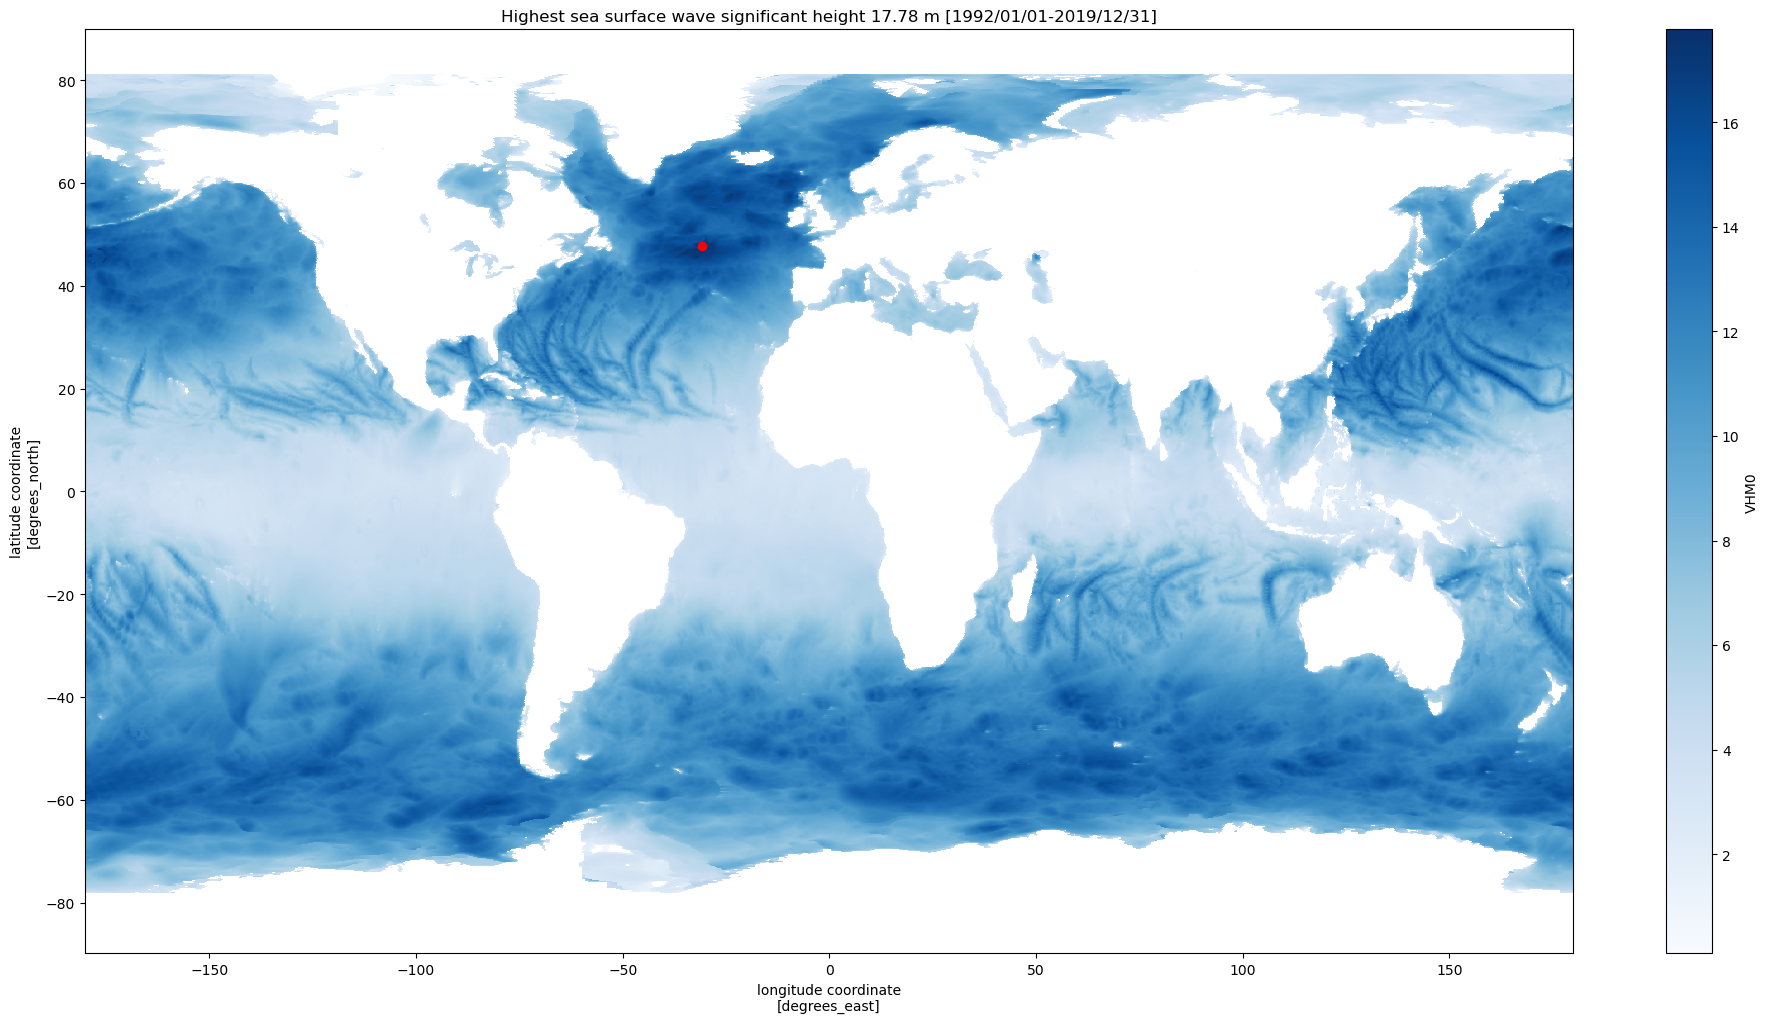

In [9]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(24,12))
VHM0_max.VHM0.plot(cmap='Blues')
plt.scatter(Highest_point.longitude.values,Highest_point.latitude.values, c='r')
plt.title(f"Highest sea surface wave significant height {VHM0_max.VHM0.max().values:.2f} m [1992/01/01-2019/12/31]")